# Use `varbvs` result to compare 
plot the varbvs estimates of number of causal genes vs. the true number.

rank all blocks by the sum of PIPs, and then assess true positive and false positive rates.

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import os
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/data/deletion_simu")
# pipsum = pd.read_csv(f"{cwd}/deletion.genes.block30.for_simu.sample.genes.varbvs.all.blocks.pip.sum.csv", header = None, names = [pipsum"])
pipsum = pd.read_csv(f"{cwd}/deletion.genes.block30.for_simu.sample.genes.block_0_7.SuSiE.L_1.susie.all.blocks.pip.sum.csv", header = None, names = ["pipsum"])

In [3]:
betas_all = pd.read_csv(f"{cwd}/deletion.genes.block30.for_simu.sample.beta", header = None, names = ["beta"])

In [4]:
index = pd.read_csv(f"{cwd}/deletion.genes.block30.for_simu.sample.block1.forsimu.index.csv", header = None, names = ["start", "end"], sep = "\t")

In [58]:
index.head(10)

,start,end
0,0,7
1,14,23
2,93,97
3,164,177
4,229,236
5,399,399
6,785,788
7,841,841
8,853,855
9,891,891


In [5]:
pipsum["real"] = [len([k for k in betas_all["beta"].tolist()[i:j+1] if k > 0]) for i,j in zip(index["start"], index["end"])]

In [34]:
pipsum.shape

(527, 2)

In [108]:
pips_varbvs = pd.read_csv(f"{cwd}/deletion.genes.block30.for_simu.sample.genes.varbvs.all.blocks.pip.csv", header = None, names = ["pip_v"])
pips_susie = pd.read_csv(f"{cwd}/deletion.genes.block30.for_simu.sample.genes.block_0_7.SuSiE.L_1.susie.all.blocks.pip.csv", header = None, names = ["pip_s"])

In [109]:
pips = pd.concat([pips_varbvs, pips_susie], axis=1)

In [110]:
pips.head()

,pip_v,pip_s
0,0.072735,0.0
1,0.072734,0.0
2,0.072733,0.0
3,0.072733,0.0
4,0.072732,0.0


In [111]:
pips["beta"] = [item for item in [k for sublist in [betas_all["beta"].tolist()[i:j+1] for i,j in zip(index["start"], index["end"])] for k in sublist]]
pips["effect"] = [1 if item != 0 else 0 for item in [k for sublist in [betas_all["beta"].tolist()[i:j+1] for i,j in zip(index["start"], index["end"])] for k in sublist]]

In [186]:
s = 1018
e = 1031

In [187]:
susie = readRDS(paste("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/block_", s, "_", e, "/deletion.genes.block30.for_simu.sample.genes.block_", s, "_", e, ".SuSiE.L_1.prior_0p005.susie.rds", sep = ""))

In [188]:
susie$pip

[1] 0.04141259 0.04141259 0.28997597 0.05701808 0.05701808 0.05701808
 [7] 0.05701808 0.05701808 0.05701808 0.05701808 0.05701808 0.05701808
[13] 0.05701808 0.05701808

In [190]:
varbvs = readRDS(paste("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/block_", s, "_", e, "/deletion.genes.block30.for_simu.sample.genes.block_", s, "_", e, ".varbvs.rds", sep = ""))

In [191]:
varbvs$pip

V1         V2         V3         V4         V5         V6         V7 
0.05000478 0.05000485 0.28605667 0.06166841 0.06166743 0.06166643 0.06166543 
        V8         V9        V10        V11        V12        V13        V14 
0.06166445 0.06166351 0.06166262 0.06166180 0.06166107 0.06166042 0.06165987

In [112]:
pips.head(428)

,pip_v,pip_s,beta,effect
0,0.072735,0.0,0.000000,0
1,0.072734,0.0,0.000000,0
2,0.072733,0.0,0.791109,1
3,0.072733,0.0,0.000000,0
4,0.072732,0.0,0.000000,0
...,...,...,...,...
423,0.223754,0.2,-0.000000,0
424,0.223792,0.2,0.000000,0
425,0.223857,0.2,1.643100,1
426,0.223914,0.2,0.000000,0


In [62]:
pips[pips["beta"] != 0].head(50)

,pip,effect,beta
2,0.000000e+00,1,0.791109
23,3.554002e-11,1,0.985360
25,2.000000e-01,1,1.754288
28,2.000000e-01,1,0.010811
34,0.000000e+00,1,0.173688
91,0.000000e+00,1,0.621799
108,0.000000e+00,1,0.957889
145,0.000000e+00,1,1.057356
160,0.000000e+00,1,0.945642
249,0.000000e+00,1,0.816182


### FDR

In [45]:
pips_cutoff = pips[pips["pip"] > 0]

In [28]:
pips_cutoff.head(50)

,pip,effect
23,3.554002e-11,1
24,2.000000e-01,0
25,2.000000e-01,1
26,2.000000e-01,0
27,2.000000e-01,0
28,2.000000e-01,1
50,1.000000e+00,0
72,3.333333e-01,0
73,3.333333e-01,0
74,3.333333e-01,0


In [29]:
pips_cutoff.shape

(961, 2)

In [30]:
sum(pips_cutoff["effect"])

86

In [31]:
(pips_cutoff.shape[0] - sum(pips_cutoff["effect"])) / pips_cutoff.shape[0]

0.9105098855359001

### Power

In [32]:
pips_cutoff[pips_cutoff["effect"] == 1].shape[0] / sum(pips["effect"])

0.7166666666666667

In [33]:
pips_cutoff[pips_cutoff["effect"] == 1].shape

(86, 2)

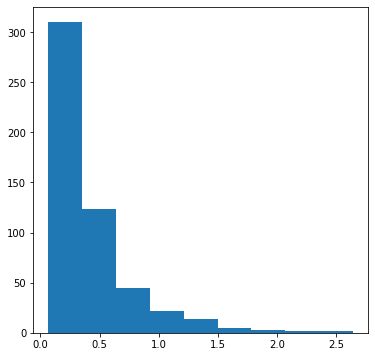

In [31]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (6,6))
plt.hist(pipsum["pipsum"].tolist(), bins = 9)
plt.show()

Text(0.5, 1.0, 'Histogram of number of genes in blocks')

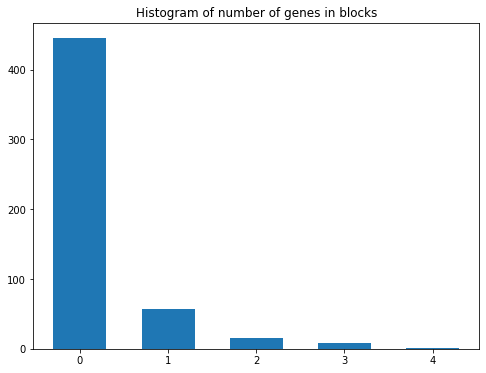

In [30]:
counts = {i: pipsum["real"].tolist().count(i) for i in set(pipsum["real"].tolist())}
fig, ax = plt.subplots(figsize = (8,6))
plt.bar(list(counts.keys()), list(counts.values()), width = 0.6)
ax.set_title("Histogram of number of genes in blocks")